In [91]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from joblib import dump
import seaborn as sns


In [92]:
df1 = pd.read_csv("undark.csv")
df2 = pd.read_csv("dark_patterns.csv")
df1

,Link,Pattern String,Deceptive?
0,https://www.fashionnova.com/,Fashion Nova | Fashion Online For Women | Affo...,0
1,https://www.gymshark.com/,Gymshark Official Store - Shop Gym Clothes & W...,0
2,https://zanerobe.com/,ZANEROBE - Considered and contemporary men’s a...,0
3,https://colourpop.com/,ColourPop Cosmetics Skip to content ✈ FREE WOR...,0
4,https://www.aloyoga.com/,"Alo Yoga | Yoga leggings, clothes, and accesso...",0
...,...,...,...
715,https://www.plumbworld.co.uk/ceramica-curved-b...,Offer ends in 03 days 19 hours : 54 mins : 22 ...,1
716,https://www.prettylittlething.us/freyana-rose-...,35% OFF EVERYTHING* EXCL SALE & BEAUTY ENTER: ...,1
717,https://www.prettylittlething.us/freyana-rose-...,"HURRY, ORDER WITHIN 16h 59m 06s TO GET 35% OFF...",1
718,https://www.proflowers.com/product/premium-all...,LAST CHANCE TO SAVE... enter your email to Sav...,1


In [93]:
#Remove null strings in Pattern String Column
df1 = df1[pd.notnull(df1["Pattern String"])]
df1 = df1.drop_duplicates()
# Apply the condition
df1['Deceptive?'] = np.where(df1['Deceptive?'] == 0, 'No', 'Yes')
col = ["Pattern String", "Deceptive?"]
df1= df1[col]
df1['Deceptive?'].value_counts()


Yes    206
No     196
Name: Deceptive?, dtype: int64

In [94]:
df2

,Pattern String,Comment,Pattern Category,Pattern Type,Where in website?,Deceptive?,Website Page
0,Collin P. from Grandview Missouri just bought ...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://alaindupetit.com/collections/all-suits...
1,"Faith in Glendale, United States purchased a C...",Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bonescoffee.com/products/strawberry-ch...
2,Sharmeen Atif From Karachi just bought Stylish...,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://brandsego.com/collections/under-rs-99/...
3,9 people are viewing this.,Product detail,Social Proof,Activity Notification,Product Page,No,https://brightechshop.com/products/ambience-so...
4,5338 people viewed this in the last hour,Periodic popup,Social Proof,Activity Notification,Product Page,No,https://bumpboxes.com/
...,...,...,...,...,...,...,...
1813,$132.90 $99.00,Website adds free items to show discount,Misdirection,Visual Interference,Cart Page,No,https://www.planetofthevapes.com/products/plan...
1814,This offer is only VALID if you add to cart now!,Popup asking you to buy more,Misdirection,Visual Interference,Product Page,No,https://www.rockymountainoils.com/single-essen...
1815,NaN,Deterministic draw. Always give you the prize ...,Misdirection,Visual Interference,Product Page,Yes,https://www.sammydress.com/
1816,NaN,Shows you prices in the popup based on your cu...,Misdirection,Visual Interference,Product Page,No,https://www.shoedazzle.com/products/FEELIN-A-L...


In [95]:
df2 = df2[pd.notnull(df2["Pattern String"])]
df2 = df2.drop_duplicates()
#df2['Deceptive?'].replace({'Yes': 1, 'No': 0}, inplace=True)
df2.loc[df2['Deceptive?'] == 'Depends', 'Deceptive?'] = "Yes"
col = ["Pattern String", "Deceptive?"]
df2 = df2[col]
print(df2["Deceptive?"].value_counts())

No     1359
Yes     152
Name: Deceptive?, dtype: int64


In [96]:
final_df = pd.concat([df1, df2])


label_encoder = LabelEncoder()
# Fit and transform the column
final_df['Deceptive?'] = label_encoder.fit_transform(final_df['Deceptive?'])

final_df

,Pattern String,Deceptive?
0,Fashion Nova | Fashion Online For Women | Affo...,0
1,Gymshark Official Store - Shop Gym Clothes & W...,0
2,ZANEROBE - Considered and contemporary men’s a...,0
3,ColourPop Cosmetics Skip to content ✈ FREE WOR...,0
4,"Alo Yoga | Yoga leggings, clothes, and accesso...",0
...,...,...
1810,TWO FREE PILLOWS AND 30% OFF WITH PROMO CODE,0
1812,Compare at,0
1813,$132.90 $99.00,0
1814,This offer is only VALID if you add to cart now!,0


In [97]:
# Calculate class distribution
class_distribution = final_df['Deceptive?'].value_counts()

# Print class distribution
print("Class Distribution:")
print(class_distribution)

# Calculate class imbalance ratio
imbalance_ratio = class_distribution.min() / class_distribution.max()

# Print class imbalance ratio
print("\nClass Imbalance Ratio:", imbalance_ratio)

Class Distribution:
0    1555
1     358
Name: Deceptive?, dtype: int64

Class Imbalance Ratio: 0.2302250803858521


In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    final_df['Pattern String'], final_df["Deceptive?"], train_size = .7, random_state=42)
#count_vect = CountVectorizer()
#X_train_counts = count_vect.fit_transform(X_train)
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(y_train.dtype)
print(y_train.unique())


int32
[1 0]


Best parameters for Bernoulli Naive Bayes:  {'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__use_idf': True}


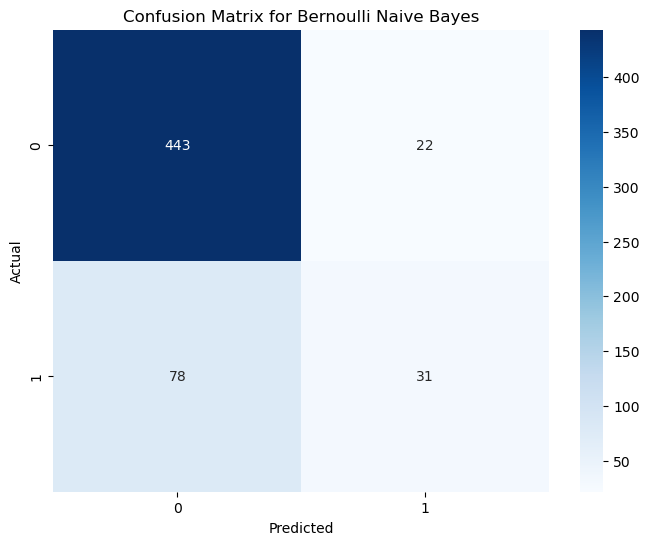

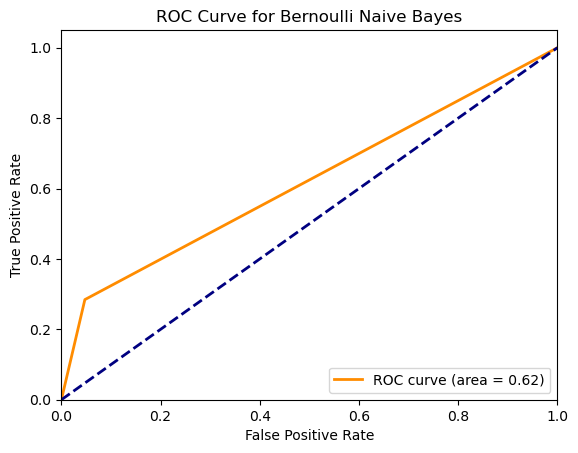

Best parameters for Logistic Regression:  {'logisticregression__C': 1, 'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__use_idf': False}


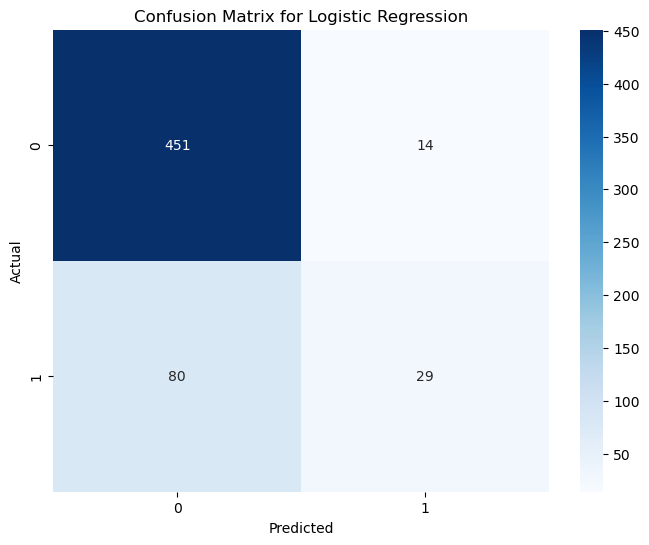

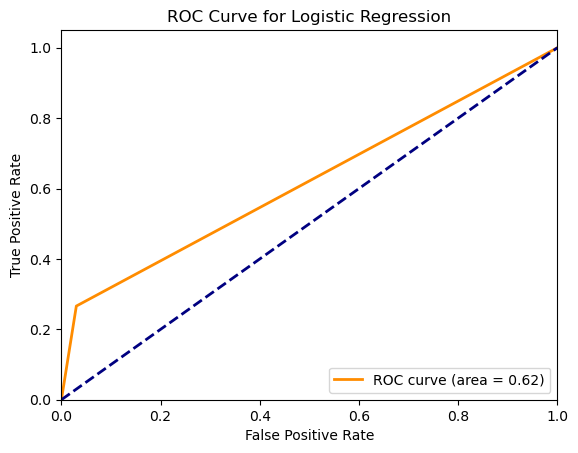

Best parameters for Support Vector Machine:  {'tfidfvectorizer__ngram_range': (1, 1), 'tfidfvectorizer__use_idf': False}


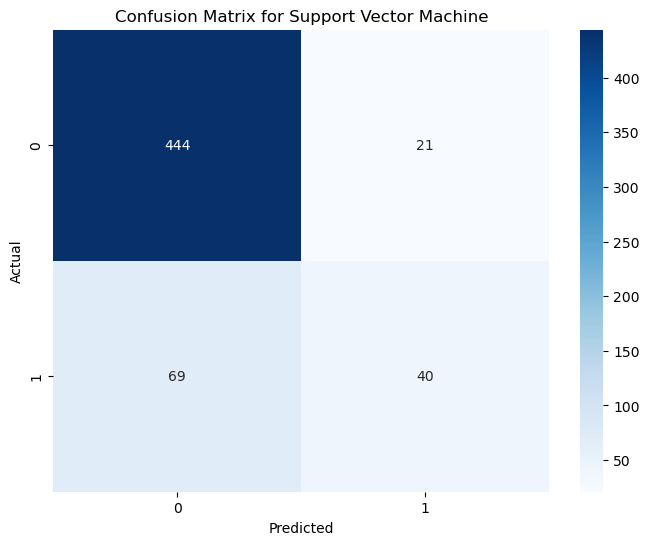

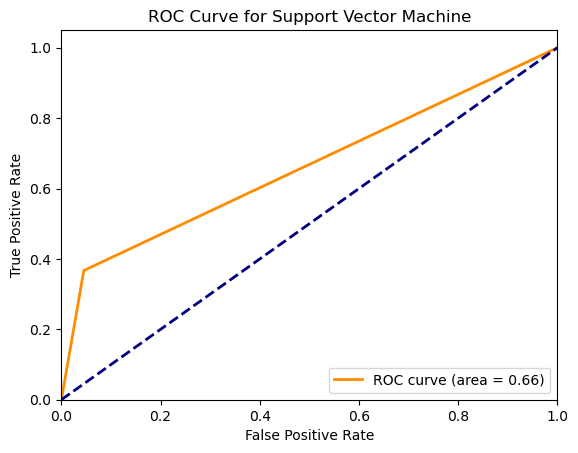

Best parameters for Random Forest:  {'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__use_idf': True}


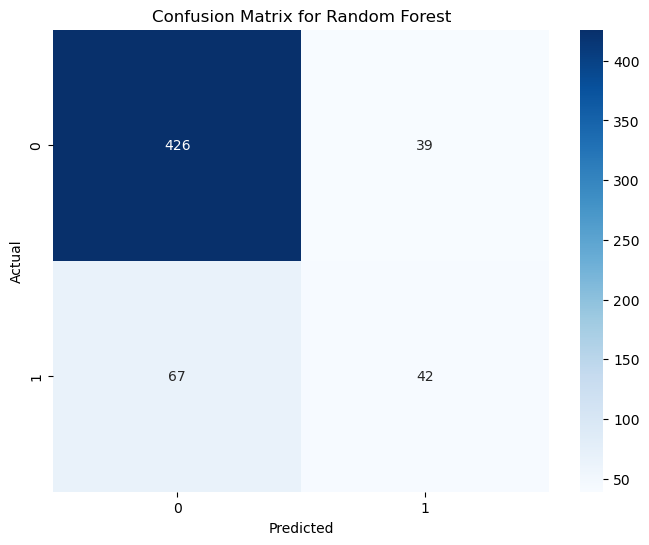

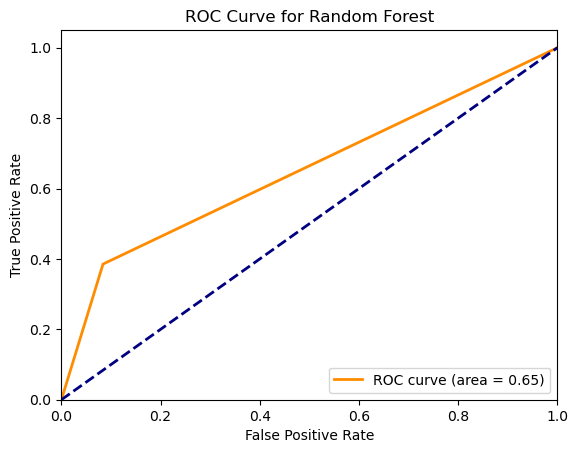

Best parameters for Gradient Boosting:  {'tfidfvectorizer__ngram_range': (1, 2), 'tfidfvectorizer__use_idf': False}


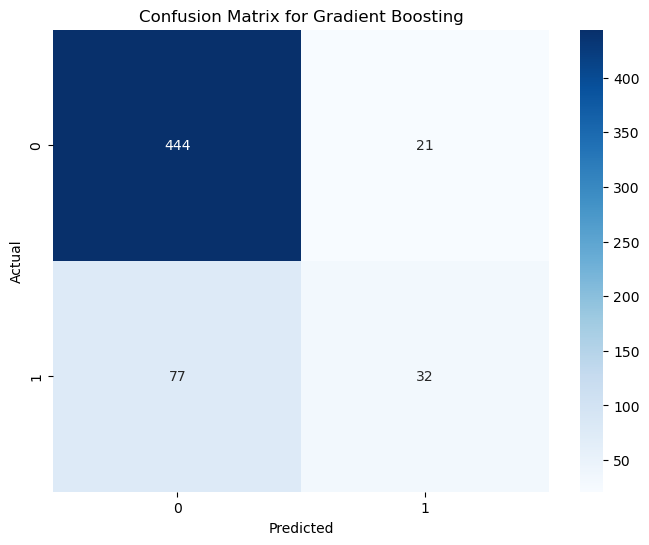

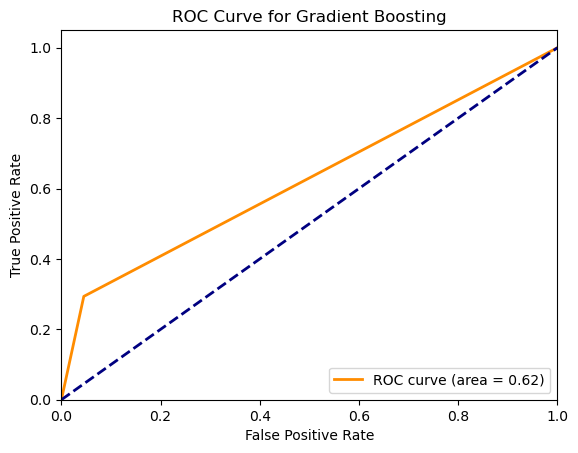

Bernoulli Naive Bayes Accuracy: 0.8258
Logistic Regression Accuracy: 0.8362
Support Vector Machine Accuracy: 0.8432
Random Forest Accuracy: 0.8153
Gradient Boosting Accuracy: 0.8293
Bernoulli Naive Bayes ROC AUC Score: 0.6185
Logistic Regression ROC AUC Score: 0.6180
Support Vector Machine ROC AUC Score: 0.6609
Random Forest ROC AUC Score: 0.6507
Gradient Boosting ROC AUC Score: 0.6242


In [99]:
# Create TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transform training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = vectorizer.transform(X_test)


# Create a dictionary to hold the classifiers
classifiers = {
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Create an array to store accuracies
accuracies = []

# Create an array to store ROC AUC scores
roc_auc_scores = []

# Iterate through classifiers
for name, clf in classifiers.items():
    # Create a pipeline with vectorizer and classifier
    text_clf = make_pipeline(TfidfVectorizer(), clf)
    
    # Define the parameter grid for grid search
    parameters = {
        'tfidfvectorizer__ngram_range': [(1, 1), (1, 2)],
        'tfidfvectorizer__use_idf': (True, False),
    }

    # Adjust parameters for Logistic Regression
    if name == 'Logistic Regression':
        parameters['logisticregression__C'] = [0.001, 0.01, 0.1, 1, 10, 100]

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(text_clf, parameters, cv=StratifiedKFold(n_splits=5), scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Print the best parameters found by grid search
    print(f"Best parameters for {name}: ", grid_search.best_params_)

    # Fit the model with the best parameters
    best_clf = grid_search.best_estimator_
    
    # Make predictions on the test set
    y_pred = best_clf.predict(X_test)
    
     # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1'], yticklabels=['0', '1'])
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Calculate accuracy
    acc = metrics.accuracy_score(y_test, y_pred)
    
    # Save the result
    accuracies.append((name, acc))
    
    # Plot ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculate ROC AUC score
    roc_auc_score_val = roc_auc_score(y_test, y_pred)
    roc_auc_scores.append((name, roc_auc_score_val))

# Print the results
for name, acc in accuracies:
    print(f'{name} Accuracy: {acc:.4f}')

# Print ROC AUC scores
for name, roc_auc in roc_auc_scores:
    print(f'{name} ROC AUC Score: {roc_auc:.4f}')

In [100]:
# Evaluate the best performing classifier on the test set
best_classifier_name, best_classifier_acc = max(accuracies, key=lambda x: x[1])
print(f"\nBest Performing Classifier: {best_classifier_name}, Accuracy: {best_classifier_acc:.4f}")


Best Performing Classifier: Support Vector Machine, Accuracy: 0.8432


In [101]:
# Save the best model to disk
best_classifier_name, best_classifier_acc = max(accuracies, key=lambda x: x[1])
best_model = make_pipeline(vectorizer, classifiers[best_classifier_name])
dump(best_model, 'best_model_presenceClassifier.joblib')

['best_model_presenceClassifier.joblib']